In [ ]:
using Distributions,Plots,Randoms,SpecialFunctions

Q1 ALGORITHMN IS CODED BELOW USING BINOMIAL PROBABILITIES 

In [10]:
loops = []
function bern(x,y,c_x,c_y)
    
    accept = 1
    iter = 0
    c = c_y/(c_x + c_y)
    while accept == 1
        iter = iter + 1
        c_1 = binomial(1,C)
        
        if c == 1
            p_x = Bernoulli(x)
            c_2 = binomial(1,p_x)
            
            if c_2 == 1
                push!(loops , iter)
                return x
            end
        else
            p_y = Bernoulli(y)
            c_2 = binomial(1,p_y)
            
            if c_2 == 1
                push!(loops , iter)
                return y
            end
        end
        
    end
    
end

bern (generic function with 1 method)

Q2.CODE BEGINS HERE

In [2]:
arr=[]
function p_ar(p)
    arr=[]
    accept=0
    counter=0
    while accept==0
        counter=counter+1
        i=0
        sum=0
        while(i<p)
            x=rand(Uniform(-1,1))
            sum=sum+x*x
            push!(arr,x)
            i=i+1
        end
        if(sum<=1)
            accept=1
        end
    end
    push!(arr,counter)
    return (arr)
end   


p_ar (generic function with 1 method)

In [3]:
push=[]
counts=[]
function ar(p)
    counts=[]
    push=[]
    mean_count=0
    for i in 1:10000
        push=p_ar(p)
        push!(counts,push[p+1])
    end
    return sum(counts)/10000
    #print(counts[2])
end    
        

ar (generic function with 1 method)

In [4]:
function gama(p)
    return (gamma((p/2)+1)/(π^(p/2)))
end

gama (generic function with 1 method)

In [5]:
c2 = (gama(2))*4
m2 = ar(2)
println("Iterations(c1) = " , c2)
println("Mean Iterations (p=2) = " , m2)


Iterations(c1) = 1.2732395447351628
Mean Iterations (p=2) = 0.7898558892953571


In [6]:
c3 = (gama(3))*4
m3 = ar(3)
println("Iterations(c) = " , c3)
println("Mean Iterations (p=3) = " , m3)

Iterations(c) = 0.954929658551372
Mean Iterations (p=3) = 0.5262826555406422


For p=2, we are using the same algo to plot a scatter plot of the random sample

In [7]:
counts_1 = []
function circle()
    
    accept = 0
    counter = 0
    
    while accept == 0
        counter = counter + 1
        x1= rand(Uniform(-1,1))
        x2= rand(Uniform(-1,1))
        if x1*x1 + x2*x2 < 1 
            accept = 1
            push!(counts_1, counter)
            return (x1,x2)
        end
    end
end

circle (generic function with 1 method)

In [8]:
arr1 = []
x = []
y = []
for i in 1:10000
    push!(arr1 , circle())
    push!(x , arr1[i][1])
    push!(y , arr1[i][2])
end

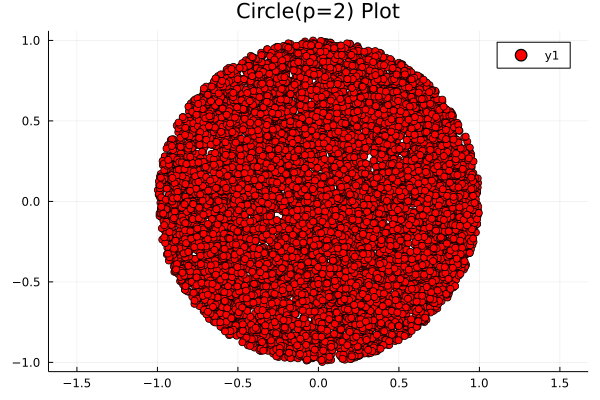

In [9]:
plot(x,y,seriestype = :scatter, title = "Circle(p=2) Plot",aspect_ratio=:equal,color="red")

Q3 CODE BEGINS HERE

In [18]:
#Using inverse transform for normal distribution
function normal_ar(a)
    accept = 0
    counter = 0
    while accept == 0
        counter = counter + 1
        u = rand(Normal(0,1))
        
        if u < a && u > -a
            accept = 1
            return (counter , u)
        end
    end
end

normal_ar (generic function with 1 method)

In [19]:
#function to define truncated normal distribution
function truncated(a)
    return  1/(cdf.(Normal(),a) - cdf.(Normal(),a*(-1)))
end

truncated (generic function with 1 method)

In [23]:
#iterating 1000 to create a random variable
arr_2 = []
arr_4 = []
sample_2 = []
sample_4 = []
for i in 0:999
    push!(arr_2 , normal_ar(2)[1])
    push!(arr_4 , normal_ar(4)[1])
    push!(sample_2 , normal_ar(2)[2])
    push!(sample_4 , normal_ar(4)[2])
end

In [25]:
#calculating number of iterations 
a_2 = (truncated(1))
m_2 = sum(arr_2)/1000
a_4 = (truncated(4))
m_4 = sum(arr_4)/1000
println("Iterations(c) for a = 2 is    :" , a_2)
println("Mean Iterations for a = 2 is  :" , m_2)
println("Iterations(c) for a = 4 is    :" , a_4)
println("Mean Iterations for a = 4 is  :" , m_4)

Iterations(c) for a = 2 is    :1.4647947734915436
Mean Iterations for a = 2 is  :1.059
Iterations(c) for a = 4 is    :1.0000633464961906
Mean Iterations for a = 4 is  :1.0


In [26]:
#calculating sample variance
println("Calculated Variance for a = 2 is: ",var(sample_2))
println("Observed Variance for a = 2 is: ",var(TruncatedNormal(0, 1, -2, 2)))
println("Calculated Variance for a = 4 is: ",var(sample_4))
println("Observed Variance for a = 4 is: ",var(TruncatedNormal(0, 1, -4, 4)))

Calculated Variance for a = 2 is: 0.7915055375900838
Observed Variance for a = 2 is: 0.7737413035499233
Calculated Variance for a = 4 is: 0.9537499137312991
Observed Variance for a = 4 is: 0.9989292903724738


In [27]:
#calculating the sample mean 
println("Calculated Mean for a = 2 is: ",mean(sample_2))
println("Observed Mean for a = 2 is: ", mean(TruncatedNormal(0, 1, -2, 2)))
println("Calculated Mean for a = 4 is: ",mean(sample_4))
println("Observed Mean for a = 4 is: ",mean(TruncatedNormal(0, 1, -4, 4)))

Calculated Mean for a = 2 is: -0.015178874714746254
Observed Mean for a = 2 is: 0.0
Calculated Mean for a = 4 is: -0.02167741113932127
Observed Mean for a = 4 is: 0.0
